In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
dataset= pd.read_csv(r"Telecom.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Information About the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# check whether any null value present in dataset or not 
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# check duplicate value
dataset.duplicated().sum()

0

**There is not a null value or duplicate value in dataset**

**But there is Columns name TotalCharges which have numeric value in it but data type is Object so we change it to numeric**

In [7]:
dataset['TotalCharges']=pd.to_numeric(dataset.TotalCharges,errors='coerce')

**check again after above operation there is null value or not**

In [8]:
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**There is 11 null value in TotalCharges column so we can fill this by mean value**


In [9]:
dataset.fillna(dataset.TotalCharges.mean(),inplace=True)

In [10]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# Print of all column unique value if the column is object type
def printUniquecol(dataset):
    for col in dataset:
        if dataset[col].dtype=='object':
            print("{}= {}".format(col,dataset[col].unique()))
printUniquecol(dataset)

customerID= ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender= ['Female' 'Male']
Partner= ['Yes' 'No']
Dependents= ['No' 'Yes']
PhoneService= ['No' 'Yes']
MultipleLines= ['No phone service' 'No' 'Yes']
InternetService= ['DSL' 'Fiber optic' 'No']
OnlineSecurity= ['No' 'Yes' 'No internet service']
OnlineBackup= ['Yes' 'No' 'No internet service']
DeviceProtection= ['No' 'Yes' 'No internet service']
TechSupport= ['No' 'Yes' 'No internet service']
StreamingTV= ['No' 'Yes' 'No internet service']
StreamingMovies= ['No' 'Yes' 'No internet service']
Contract= ['Month-to-month' 'One year' 'Two year']
PaperlessBilling= ['Yes' 'No']
PaymentMethod= ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn= ['No' 'Yes']


#### There are some value in some column which have "No phone service","No Internet service" so we replace it with "No"

In [12]:
dataset.replace("No phone service",'No',inplace=True)
dataset.replace("No internet service",'No',inplace=True)

In [13]:
printUniquecol(dataset)

customerID= ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender= ['Female' 'Male']
Partner= ['Yes' 'No']
Dependents= ['No' 'Yes']
PhoneService= ['No' 'Yes']
MultipleLines= ['No' 'Yes']
InternetService= ['DSL' 'Fiber optic' 'No']
OnlineSecurity= ['No' 'Yes']
OnlineBackup= ['Yes' 'No']
DeviceProtection= ['No' 'Yes']
TechSupport= ['No' 'Yes']
StreamingTV= ['No' 'Yes']
StreamingMovies= ['No' 'Yes']
Contract= ['Month-to-month' 'One year' 'Two year']
PaperlessBilling= ['Yes' 'No']
PaymentMethod= ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn= ['No' 'Yes']


In [14]:
dataset.drop(["customerID"],axis=1,inplace=True)
# this method remove customer Id column from dataset

In [15]:
#create copy of dataset
df  =dataset.copy()

In [16]:
printUniquecol(df)

gender= ['Female' 'Male']
Partner= ['Yes' 'No']
Dependents= ['No' 'Yes']
PhoneService= ['No' 'Yes']
MultipleLines= ['No' 'Yes']
InternetService= ['DSL' 'Fiber optic' 'No']
OnlineSecurity= ['No' 'Yes']
OnlineBackup= ['Yes' 'No']
DeviceProtection= ['No' 'Yes']
TechSupport= ['No' 'Yes']
StreamingTV= ['No' 'Yes']
StreamingMovies= ['No' 'Yes']
Contract= ['Month-to-month' 'One year' 'Two year']
PaperlessBilling= ['Yes' 'No']
PaymentMethod= ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn= ['No' 'Yes']


In [17]:
gender_df = pd.DataFrame(df.groupby(by =['gender'])['Churn'].count())
gender_df

,Churn
gender,
Female,3488
Male,3555


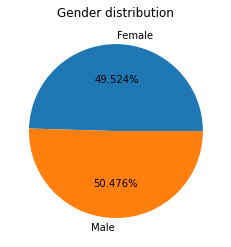

In [18]:
# pie plot of Male and female distribution
plt.pie(x=gender_df['Churn'],labels=gender_df.index, autopct='%.3f%%')
plt.title("Gender distribution")
plt.show()

**Form above plot we can see that Ratio of Male is greater than female  but the difference is very low**

In [19]:
senior_df = pd.DataFrame(df.groupby(by =['SeniorCitizen'])['Churn'].count())
senior_df

,Churn
SeniorCitizen,
0,5901
1,1142


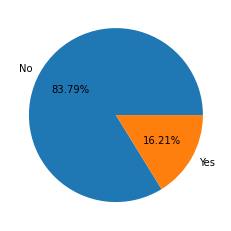

In [20]:
plt.pie(x=senior_df['Churn'],labels=['No','Yes'],autopct="%.2f%%")
plt.show()

**Form above plot we can say that their is less senior citizen is dataset . only 16.21% people are senior citizen in this dataset**

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
payment_df =df.groupby(by=['PaymentMethod'])['Churn'].count()
payment_df

PaymentMethod
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: Churn, dtype: int64

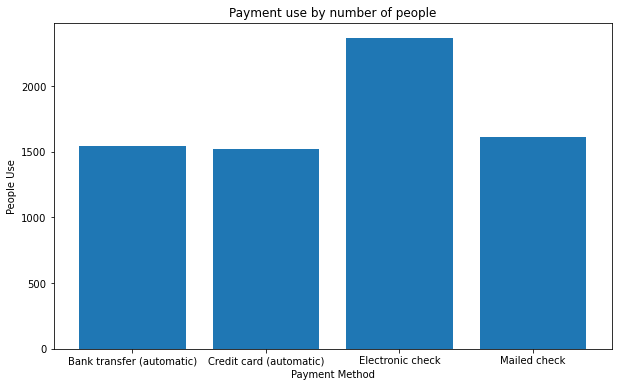

In [23]:
plt.figure(figsize=(10,6))
plt.bar(payment_df.index,payment_df.values)
plt.xlabel("Payment Method")
plt.ylabel("People Use")
plt.title("Payment use by number of people")
plt.show()

* **Plot shows that "Electronic check" method uses by more people than other method.**
* **Other method like "Bank transfer,Credit card, Mailed check" use  similar number people.**

In [24]:
contract_df =df.groupby(by=['Contract'])['Churn'].count()
contract_df

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Churn, dtype: int64

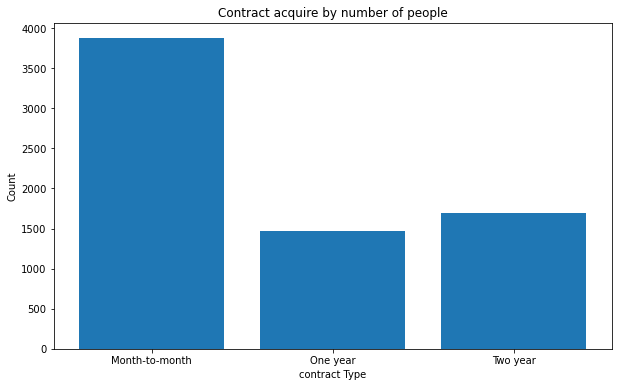

In [25]:
plt.figure(figsize=(10,6))
plt.bar(contract_df.index,contract_df.values)
plt.xlabel("contract Type")
plt.ylabel("Count")
plt.title("Contract acquire by number of people")
plt.show()

* **Most People Uses Month-to-month contract while some people use one year or Two year contract** 

In [26]:
PaperlessBilling_df =df.groupby(by=['PaperlessBilling'])['Churn'].count()
PaperlessBilling_df

PaperlessBilling
No     2872
Yes    4171
Name: Churn, dtype: int64

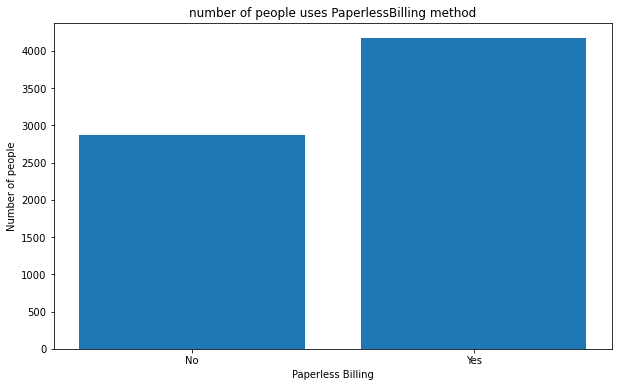

In [27]:
plt.figure(figsize=(10,6))
plt.bar(PaperlessBilling_df.index,PaperlessBilling_df.values)
plt.xlabel("Paperless Billing")
plt.ylabel("Number of people")
plt.title("number of people uses PaperlessBilling method")
plt.show()

**More people use Paperless billing Method**

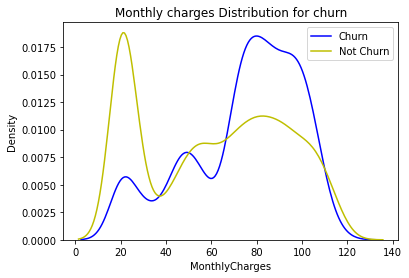

In [28]:
sns.kdeplot(df[df['Churn']=="Yes"]['MonthlyCharges'],color='b',label="Churn")
sns.kdeplot(df[df['Churn']=="No"]['MonthlyCharges'],color='y',label="Not Churn")
plt.legend()
plt.title("Monthly charges Distribution for churn")
plt.show()

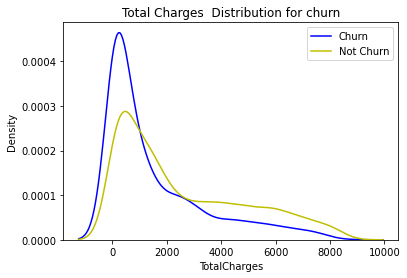

In [29]:
sns.kdeplot(df[df['Churn']=="Yes"]['TotalCharges'],color='b',label="Churn")
sns.kdeplot(df[df['Churn']=="No"]['TotalCharges'],color='y',label="Not Churn")
plt.legend()
plt.title("Total Charges  Distribution for churn")
plt.show()

## **We know that Machine Learning Model can't work on Categorical data so we have to convert this Categorical data into numerical data**

In [30]:
# All yes value is 0 and all No value replace with 1
df.replace({'Yes':0,'No':1},inplace=True)
# Female=0,Male=1 replace in df
df.replace({'Male':1,'Female':0},inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,1,1,DSL,1,0,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,1
1,1,0,1,1,34,0,1,DSL,0,1,0,1,1,1,One year,1,Mailed check,56.95,1889.50,1
2,1,0,1,1,2,0,1,DSL,0,0,1,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,0
3,1,0,1,1,45,1,1,DSL,0,1,0,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,0,0,1,1,2,0,1,Fiber optic,1,1,1,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,0


In [31]:
printUniquecol(df)

InternetService= ['DSL' 'Fiber optic' 1]
Contract= ['Month-to-month' 'One year' 'Two year']
PaymentMethod= ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


* **pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.**
* **It convert all the cloumns which are object or categorical Type to numerical columns**

In [32]:
df_dummies = pd.get_dummies(df)
df_dummies.shape

(7043, 27)

In [33]:
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_1,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,1,34,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,1,1,45,1,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,1,1,1,...,0,0,1,1,0,0,0,0,1,0


<AxesSubplot:>

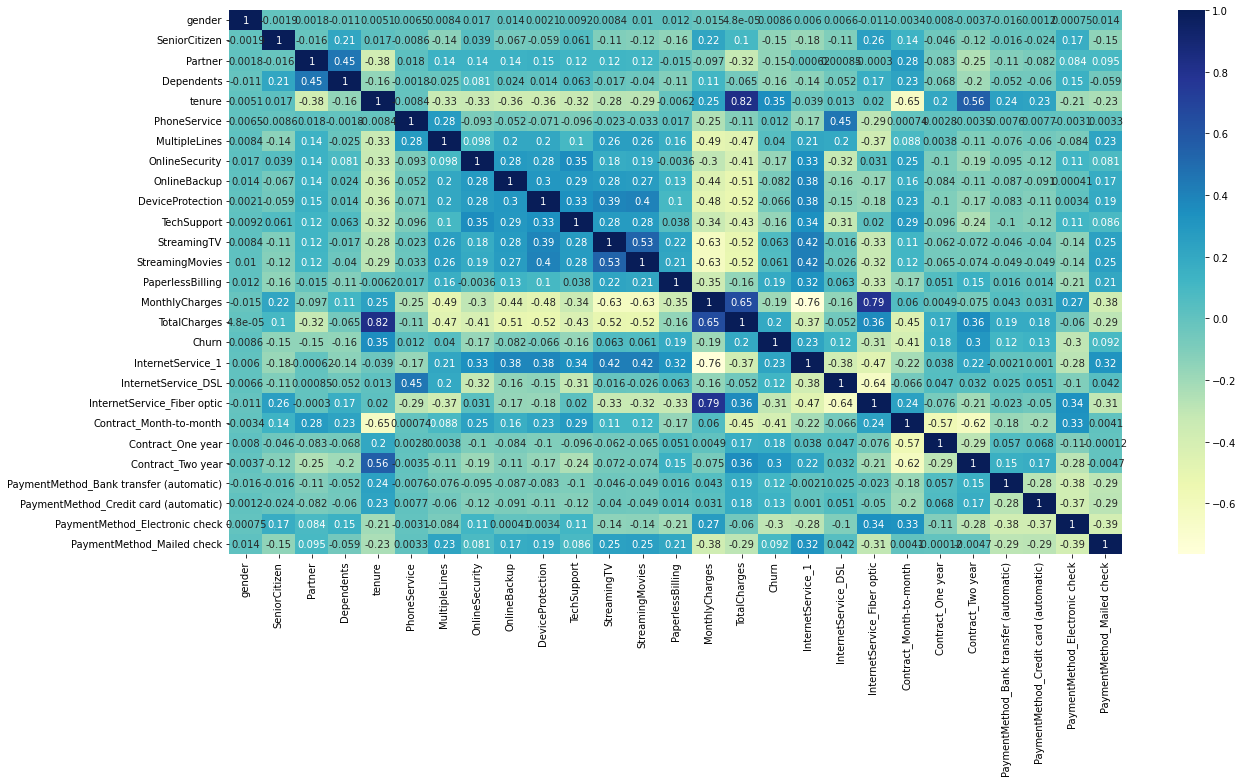

In [34]:
 #Create heatmap of dataset correlation 
plt.figure(figsize=(20,10))
sns.heatmap(df_dummies.corr(),annot=True,cmap="YlGnBu")

In [35]:
pd.DataFrame(df_dummies.corr())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_1,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,0.001808,-0.010517,0.005106,0.006488,0.008414,0.017021,0.013773,0.002105,...,0.006026,0.006568,-0.011286,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,-0.016479,0.211185,0.016567,-0.008576,-0.142948,0.038653,-0.066572,-0.059428,...,-0.182742,-0.108322,0.255338,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.001808,-0.016479,1.000000,0.452676,-0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.000615,0.000851,-0.000304,0.280865,-0.082783,-0.248091,-0.110706,-0.082029,0.083852,0.095125
Dependents,-0.010517,0.211185,0.452676,1.000000,-0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,-0.139812,-0.052010,0.165818,0.231720,-0.068368,-0.204613,-0.052021,-0.060267,0.150642,-0.059071
tenure,0.005106,0.016567,-0.379697,-0.159712,1.000000,-0.008448,-0.331941,-0.327203,-0.360277,-0.360653,...,-0.039062,0.013274,0.019720,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,0.006488,-0.008576,0.017706,-0.001762,-0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,-0.172209,0.452425,-0.289999,0.000742,0.002791,-0.003519,-0.007556,0.007721,-0.003062,0.003319
MultipleLines,0.008414,-0.142948,0.142057,-0.024526,-0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,0.210564,0.199920,-0.366083,0.088203,0.003794,-0.106253,-0.075527,-0.060048,-0.083618,0.227206
OnlineSecurity,0.017021,0.038653,0.143106,0.080972,-0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,0.333403,-0.321269,0.030696,0.246679,-0.100162,-0.191773,-0.095158,-0.115721,0.112338,0.080798
OnlineBackup,0.013773,-0.066572,0.141498,0.023671,-0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,0.381593,-0.157884,-0.165651,0.164172,-0.083722,-0.111400,-0.087004,-0.090785,0.000408,0.174164
DeviceProtection,0.002105,-0.059428,0.153786,0.013963,-0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,0.380754,-0.146291,-0.176049,0.225662,-0.102495,-0.165096,-0.083115,-0.111554,0.003351,0.187373


In [36]:
#This function remove all the correlated features which value higher than threshold value
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    

In [37]:

correlation(df_dummies,0.65)
df_dummies.shape

(7043, 25)

* **In general, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. Depending on the features and the model, correlated features might not always harm the performance of the model but that is a real risk.**
* **So we remove all correlated features whose value is greater than equal to 0.65**

In [38]:
df_dummies.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'InternetService_1',
       'InternetService_DSL', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [81]:
# import LogistiRegression function for sklearn.linear_model module and train_test_split method
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [82]:
# Divided our dataset into 2 parts data parts and target parts
X = df_dummies.drop(['Churn'],axis=1)
y = df_dummies.Churn
print("X-shape {} , y-shape {}".format(X.shape,y.shape))

X-shape (7043, 24) , y-shape (7043,)


In [83]:
# split data into train and test data 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [84]:
x_train.shape

(5634, 24)

In [85]:
clf = LogisticRegression(max_iter=200)
clf.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [86]:
clf.predict(x_test)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_absolute_error,ConfusionMatrixDisplay,recall_score

* **The accuracy_score function of the sklearn.metrics package calculates the accuracy score for a set of predicted labels against the true labels.**


* **Confusion Matrix - It is a table that is used in classification problems to assess where errors in the model were made.** 


* **absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation. MAE(Mean Absolute error) takes the average of absolute errors for a group of predictions and observations as a measurement of the magnitude of errors for the entire group**


* **recall measures the model's ability to detect positive samples.**

In [88]:
y_train_pred= clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [89]:
clf.score(x_train,y_train)

0.80386936457224

In [90]:
clf.score(x_test,y_test)

0.8034066713981547

In [91]:
accuracy_score(y_test,y_test_pred)

0.8034066713981547

In [92]:
mean_absolute_error(y_test,y_test_pred)

0.19659332860184528

**Accuracy score of the model is near 80.3% and mean_absolute_error is 19.6%** 

In [93]:
confusion_matrix(y_test,y_test_pred)

array([[182, 161],
       [116, 950]], dtype=int64)

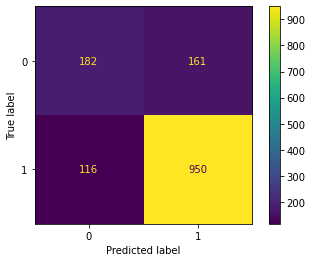

In [94]:
dis =ConfusionMatrixDisplay(confusion_matrix(y_test,y_test_pred), display_labels=clf.classes_)
dis.plot()
plt.show()

* **In confusion matrix (0,0) show True positive(TP) : You predicted positive and it’s true.**
* **In confusion matrix (1,1) show True negative(TF) : You predicted negative and it’s true.**
* **In confusion matrix (0,1) show False postivie(FP) :  You predicted positive and it’s false.**
* **In confusion matrix (1,0) show False negative(FN) : YOu predicted negative and it's false.**

* **FP and FN are type-1 or type-2 error**

In [95]:
recall_score(y_test,y_test_pred)

0.8911819887429644

**89.11%  Positive samples correctly classified as Positive to the total number of Positive samples.**

In [96]:
clf.coef_

array([[ 0.00841624, -0.179231  , -0.05378333, -0.09443823,  0.0327909 ,
        -0.54442256,  0.22686196, -0.42533936, -0.16935101, -0.05588072,
        -0.37461595,  0.10017852,  0.20970768,  0.38327271, -0.00753696,
         1.45942056,  0.70682978, -0.38631113,  0.25321767,  0.79800383,
         0.21656698,  0.32306125, -0.14119137,  0.2664735 ]])

In [97]:
clf.intercept_

array([0.70619679])

In [98]:
df_dummies.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'InternetService_1',
       'InternetService_DSL', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

#### To Calculate the revenue of that user which are not churn we use linear regression model 

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
#Remove MonthlyCharges and churn column form dummies dataset and divided 
x2= df_dummies.drop(['Churn','MonthlyCharges'],axis=1)
y2 = df_dummies.MonthlyCharges

In [101]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.2,random_state=10)

In [102]:
#Called LinearRegression Object and fit method in it
mlr = LinearRegression()
mlr.fit(x2_train,y2_train)

LinearRegression()

In [103]:
mlr.score(x2_test,y2_test)

0.9988784200408164

**Accuracy score is 99.8% of that model**

In [104]:
clf.predict(X)

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [105]:
new_df = pd.DataFrame(X)
new_df["Churn"] =clf.predict(X)

In [106]:
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_1,InternetService_DSL,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,0,1,1,1,1,1,0,1,...,0,1,1,0,0,0,0,1,0,0
1,1,0,1,1,34,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,1
2,1,0,1,1,2,0,1,0,0,1,...,0,1,1,0,0,0,0,0,1,1
3,1,0,1,1,45,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,0,0,1,1,2,0,1,1,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,1
7039,0,0,0,0,72,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
7040,0,0,0,0,11,1,1,0,1,1,...,0,1,1,0,0,0,0,1,0,1
7041,1,1,0,1,4,0,0,1,1,1,...,0,0,1,0,0,0,0,0,1,0


In [107]:
new_df = new_df[new_df['Churn']==1]
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_1,InternetService_DSL,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1,1,0,1,1,34,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,1
2,1,0,1,1,2,0,1,0,0,1,...,0,1,1,0,0,0,0,0,1,1
3,1,0,1,1,45,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
6,1,0,1,0,22,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
7,0,0,1,1,10,1,1,0,1,1,...,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,1,1,72,0,1,1,1,1,...,1,0,0,0,1,1,0,0,0,1
7038,1,0,0,0,24,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,1
7039,0,0,0,0,72,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
7040,0,0,0,0,11,1,1,0,1,1,...,0,1,1,0,0,0,0,1,0,1


In [108]:
#predicated MonthlyCharges
x3_train,x3_test,y3_train, y3_test = train_test_split(new_df.drop(['Churn','MonthlyCharges'],axis=1),new_df.MonthlyCharges,test_size=0.2,random_state=10)

In [109]:
y_pred = mlr.predict(new_df.drop(['Churn','MonthlyCharges'],axis=1))
y_true =pd.DataFrame(new_df.MonthlyCharges)

In [119]:
y_true

,MonthlyCharges
1,56.95
2,53.85
3,42.30
6,89.10
7,29.75
...,...
7037,21.15
7038,84.80
7039,103.20
7040,29.60


In [110]:
mlr.score(x3_test,y3_test)

0.9988734931564272

In [111]:
new_df['MonthlyCharges']=mlr.predict(new_df.drop(['Churn','MonthlyCharges'],axis=1))

C:\Users\RAHUL SUTHAR\AppData\Local\Temp\ipykernel_10424\1129763590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['MonthlyCharges']=mlr.predict(new_df.drop(['Churn','MonthlyCharges'],axis=1))


In [112]:
new_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_1,InternetService_DSL,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
1,1,0,1,1,34,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,1
2,1,0,1,1,2,0,1,0,0,1,...,0,1,1,0,0,0,0,0,1,1
3,1,0,1,1,45,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
6,1,0,1,0,22,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
7,0,0,1,1,10,1,1,0,1,1,...,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,1,1,72,0,1,1,1,1,...,1,0,0,0,1,1,0,0,0,1
7038,1,0,0,0,24,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,1
7039,0,0,0,0,72,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
7040,0,0,0,0,11,1,1,0,1,1,...,0,1,1,0,0,0,0,1,0,1


In [113]:
new_df['MonthlyCharges']

1        55.059595
2        55.019764
3        40.059024
6        89.957587
7        29.920548
           ...    
7037     19.907084
7038     85.060623
7039    104.949161
7040     29.881378
7042    104.917105
Name: MonthlyCharges, Length: 5464, dtype: float64

In [138]:
predicate_value  =pd.DataFrame(new_df['MonthlyCharges'])

In [139]:
monthlyCharges = pd.concat([predicate_value,y_true],axis=1)
monthlyCharges.set_axis(['Predicated value','Actual value'],axis=1,inplace=True)

In [140]:
monthlyCharges

,Predicated value,Actual value
1,55.059595,56.95
2,55.019764,53.85
3,40.059024,42.30
6,89.957587,89.10
7,29.920548,29.75
...,...,...
7037,19.907084,21.15
7038,85.060623,84.80
7039,104.949161,103.20
7040,29.881378,29.60


In [141]:
monthlyCharges['difference']=abs(monthlyCharges['Predicated value']-monthlyCharges['Actual value'])

In [142]:
monthlyCharges

,Predicated value,Actual value,difference
1,55.059595,56.95,1.890405
2,55.019764,53.85,1.169764
3,40.059024,42.30,2.240976
6,89.957587,89.10,0.857587
7,29.920548,29.75,0.170548
...,...,...,...
7037,19.907084,21.15,1.242916
7038,85.060623,84.80,0.260623
7039,104.949161,103.20,1.749161
7040,29.881378,29.60,0.281378


In [143]:
monthlyCharges['(y-ymean)^2'] = (monthlyCharges['Actual value']-monthlyCharges['Actual value'].mean())**2
monthlyCharges['difference^2']=monthlyCharges['difference']**2

In [144]:
monthlyCharges

,Predicated value,Actual value,difference,(y-ymean)^2,difference^2
1,55.059595,56.95,1.890405,9.544357,3.573631
2,55.019764,53.85,1.169764,38.308601,1.368348
3,40.059024,42.30,2.240976,314.686107,5.021971
6,89.957587,89.10,0.857587,844.518808,0.735456
7,29.920548,29.75,0.170548,917.447402,0.029087
...,...,...,...,...,...
7037,19.907084,21.15,1.242916,1512.384983,1.544840
7038,85.060623,84.80,0.260623,613.087599,0.067924
7039,104.949161,103.20,1.749161,1862.837892,3.059565
7040,29.881378,29.60,0.281378,926.556720,0.079174


In [151]:
r2score = 1-(monthlyCharges['difference^2'].sum()/monthlyCharges['(y-ymean)^2'].sum())

In [152]:
r2score

0.998916232460675

In [153]:
from sklearn.metrics import r2_score

In [154]:
r2_score(y_true,y_pred)

0.998916232460675